# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading Data

In [2]:
# Reading a CSV file
df = pd.read_csv('H-2-certification-decisions-filtered.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8340\1563551793.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('H-2-certification-decisions-filtered.csv')


In [3]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358058 entries, 0 to 358057
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   case_no                   358058 non-null  object 
 1   visa_type                 358058 non-null  object 
 2   fy                        358058 non-null  int64  
 3   last_event_date           350536 non-null  object 
 4   case_status               358058 non-null  object 
 5   n_requested               245030 non-null  float64
 6   n_certified               358058 non-null  int64  
 7   is_certified              358058 non-null  bool   
 8   certification_begin_date  174851 non-null  object 
 9   certification_end_date    174842 non-null  object 
 10  job_title                 357564 non-null  object 
 11  employer_name             358035 non-null  object 
 12  employer_state            358058 non-null  object 
 13  employer_city             358025 non-null  o

# Displaying DataFrame Head

In [4]:
# Display the first few rows of the DataFrame
df.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,job_title,employer_name,employer_state,employer_city
0,9455254,H-2B,2000,10/1/1999,"DENIED, TEMPORARY",1.0,0,False,NaN,NaN,PROJECT DIRECTOR,CALIFORNIA PUBLIC INTEREST RESEARCH GROUP,CA,LOS ANGELES
1,8222219,H-2B,2000,10/4/1999,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,LAUNDRY LABORER,THE RESORT COMPANY,CO,BEAVER CREEK
2,8222168,H-2B,2000,10/4/1999,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,"COUNTER ATTENDANT, CAFETERIA","CRESTED BUTTE MOUNTAIN RESORT, INC.",CO,MT. CRESTED BUTTE
3,8222169,H-2B,2000,10/4/1999,"CERTIFIED, TEMPORARY",5.0,5,True,NaN,NaN,SKI TOW OPERATOR,"CRESTED BUTTE MOUNTAIN RESORT, INC.",CO,MT. CRESTED BUTTE
4,8222170,H-2B,2000,10/4/1999,"CERTIFIED, TEMPORARY",40.0,40,True,NaN,NaN,"CLEANER, HOUSEKEEPING","CRESTED BUTTE MOUNTAIN RESORT, INC.",CO,MT. CRESTED BUTTE


# Displaying DataFrame Columns

In [5]:
# Retrieve the column names of the DataFrame
df.columns 

Index(['case_no', 'visa_type', 'fy', 'last_event_date', 'case_status',
       'n_requested', 'n_certified', 'is_certified',
       'certification_begin_date', 'certification_end_date', 'job_title',
       'employer_name', 'employer_state', 'employer_city'],
      dtype='object')

# Displaying DataFrame Data Types

In [6]:
# Retrieve the data types of columns in the DataFrame
df.dtypes

case_no                      object
visa_type                    object
fy                            int64
last_event_date              object
case_status                  object
n_requested                 float64
n_certified                   int64
is_certified                   bool
certification_begin_date     object
certification_end_date       object
job_title                    object
employer_name                object
employer_state               object
employer_city                object
dtype: object

# Displaying DataFrame Information

In [7]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe() 

,fy,n_requested,n_certified
count,358058.000000,245030.000000,358058.000000
mean,2013.175994,19.110901,14.466536
std,6.212783,44.655759,39.244752
min,2000.000000,0.000000,0.000000
25%,2008.000000,3.000000,1.000000
50%,2014.000000,8.000000,5.000000
75%,2019.000000,20.000000,14.000000
max,2022.000000,2034.000000,2034.000000


# Calculating and Displaying DataFrame Length

In [8]:
# Calculate the length of the DataFrame
length = len(df)
# Print the length of the DataFrame
print("Length of DataFrame:", length)

Length of DataFrame: 358058


In [9]:
# Count the number of unique visa types
df['visa_type'].nunique()

# Display the list of visa types and their occurrences
df['visa_type'].value_counts()

visa_type
H-2A    179880
H-2B    178178
Name: count, dtype: int64

In [10]:
# Count the number of visas by status (Certified/Denied)
df['case_status'].value_counts()

case_status
DETERMINATION ISSUED - CERTIFICATION                       129655
CERTIFIED - FULL                                            56717
CERTIFIED                                                   42639
CERTIFIED, TEMPORARY                                        36693
CERTIFICATION                                               24711
DENIED                                                      15473
PARTIAL CERTIFIED                                            8507
WITHDRAWN                                                    8156
DETERMINATION ISSUED - CERTIFICATION EXPIRED                 8137
DENIED, TEMPORARY                                            5787
DETERMINATION ISSUED - DENIED                                3992
CERTIFIED - PARTIAL                                          3118
PARTIAL CERTIFICATION                                        3017
DETERMINATION ISSUED - PARTIAL CERTIFICATION                 2225
DETERMINATION ISSUED - WITHDRAWN                             193

In [11]:
# Simplify the case statuses into broader categories (Certified, Denied, etc.)
df['Visa_Status_Simplified'] = df['case_status'].apply(lambda x: 'Certified' if 'CERTIFIED' in x or 'CERTIFICATION' in x 
                                                       else 'Denied' if 'DENIED' in x 
                                                       else 'Withdrawn' if 'WITHDRAWN' in x 
                                                       else 'Other')

# Count the occurrences of each simplified visa status
df['Visa_Status_Simplified'].value_counts()


Visa_Status_Simplified
Certified    320648
Denied        25256
Withdrawn     10086
Other          2068
Name: count, dtype: int64

In [12]:
# Count the occurrences of each simplified visa status
status_counts = df['Visa_Status_Simplified'].value_counts()

# Calculate the percentage for each status
status_percentage = (status_counts / status_counts.sum()) * 100

# Create a DataFrame with counts and percentages
df_status_summary = pd.DataFrame({
    'Count': status_counts,
    'Percentage (%)': status_percentage
})

# Display the DataFrame
df_status_summary

,Count,Percentage (%)
Visa_Status_Simplified,,
Certified,320648,89.551972
Denied,25256,7.053606
Withdrawn,10086,2.816862
Other,2068,0.577560


# Analysis of Visa Status Distribution

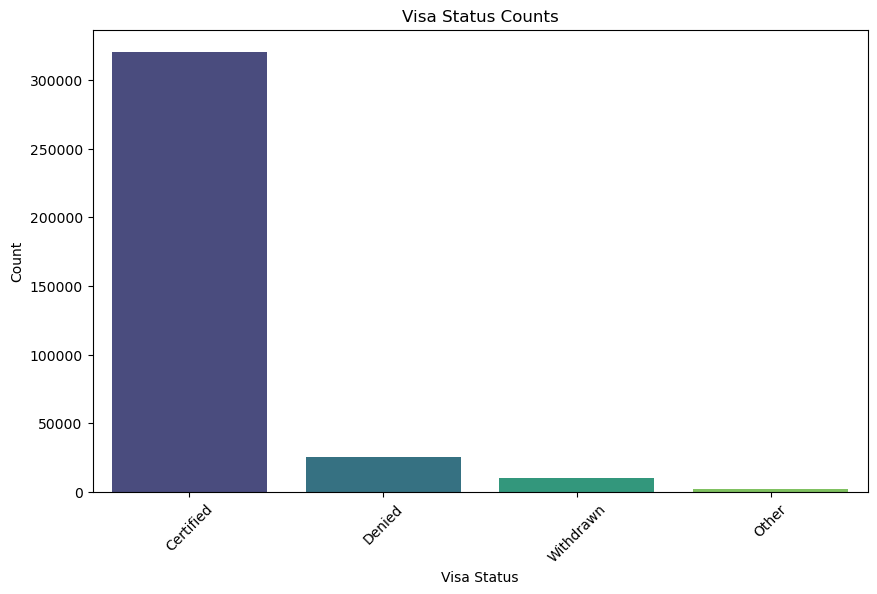

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for counts
plt.figure(figsize=(10, 6))
sns.barplot(x=df_status_summary.index, y='Count', data=df_status_summary, palette='viridis')
plt.title('Visa Status Counts')
plt.xlabel('Visa Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Step 1: Filter for certified records
certified_df = df[df['Visa_Status_Simplified'] == 'Certified']

# Step 2: Analyze job titles
job_counts = certified_df['job_title'].value_counts()
job_percentage = (job_counts / job_counts.sum()) * 100
df_job_summary = pd.DataFrame({
    'Count': job_counts,
    'Percentage (%)': job_percentage
})

# Display the DataFrames
df_job_summary

,Count,Percentage (%)
job_title,,
"LABORER, LANDSCAPE",22801,7.116039
LANDSCAPE LABORER,15730,4.909228
SHEEPHERDER,10077,3.144964
FARMWORKER; DIVERSIFIED CROP,7291,2.275472
FARMWORKER,7274,2.270167
...,...,...
LANDSCAPING AND GROUND KEEPING WORKERS,1,0.000312
LANDSCAPE LABORE,1,0.000312
SPRAY FOAM TECHNICIANS,1,0.000312


In [15]:
# Step 3: Analyze employers
employer_counts = certified_df['employer_name'].value_counts()
employer_percentage = (employer_counts / employer_counts.sum()) * 100
df_employer_summary = pd.DataFrame({
    'Count': employer_counts,
    'Percentage (%)': employer_percentage
})

df_employer_summary

,Count,Percentage (%)
employer_name,,
WESTERN RANGE ASSOCIATION,3201,0.998356
ALEWELT CONCRETE INC.,959,0.299101
"THE NORTH CAROLINA GROWER'S ASSOCIATION, INC.",442,0.137855
"LANDSCAPES UNLIMITED, LLC",357,0.111344
"FRESH HARVEST, INC.",315,0.098245
...,...,...
M & R RAUSCH,1,0.000312
JB DONOHO NURSERY,1,0.000312
JAMES R. LINDSEY DBA LINDSEY IDYLLWOOD ORCHARD,1,0.000312


# Analysis of Visa Application Outcomes by State

In [16]:
# Step 4: Analyze states
state_counts = certified_df['employer_state'].value_counts()
state_percentage = (state_counts / state_counts.sum()) * 100
df_state_summary = pd.DataFrame({
    'Count': state_counts,
    'Percentage (%)': state_percentage
})
df_state_summary

,Count,Percentage (%)
employer_state,,
NC,25375,7.913662
TX,23343,7.279946
KY,17322,5.402186
LA,17225,5.371934
NY,15316,4.776577
FL,15211,4.743831
ID,13990,4.363040
VA,12680,3.954492
CO,12283,3.830680


In [17]:
# Step 5: Analyze cities
city_counts = certified_df['employer_city'].value_counts()
city_percentage = (city_counts / city_counts.sum()) * 100
df_city_summary = pd.DataFrame({
    'Count': city_counts,
    'Percentage (%)': city_percentage
})

df_city_summary

,Count,Percentage (%)
employer_city,,
TWIN FALLS,3171,0.989003
AUSTIN,2609,0.813721
NANTUCKET,2275,0.709549
ARCADIA,1738,0.542065
PHOENIX,1658,0.517113
...,...,...
REDONDO BEACH,1,0.000312
SCHUYER,1,0.000312
COLOME,1,0.000312


In [18]:
denied_df = df[df['case_status'].str.contains('DENIED')]
job_counts_denied = denied_df['job_title'].value_counts()
job_percentage_denied = (job_counts_denied / job_counts_denied.sum()) * 100
df_job_summary_denied = pd.DataFrame({
    'Count': job_counts_denied,
    'Percentage (%)': job_percentage_denied
})

df_job_summary_denied

,Count,Percentage (%)
job_title,,
"LABORER, LANDSCAPE",1794,7.153681
"CLEANER, HOUSEKEEPING",843,3.361512
CONSTRUCTION WORKER I,572,2.280884
COOK,427,1.702688
CHILD MONITOR,399,1.591036
...,...,...
PRESIDENT & CHIEF EXECUTIVE OFFICE,1,0.003988
HOUSEKEEPER/CLEANER,1,0.003988
RF TECHNICIAN,1,0.003988


In [19]:
state_counts_denied = denied_df['employer_state'].value_counts()
state_percentage_denied = (state_counts_denied / state_counts_denied.sum()) * 100
df_state_summary_denied = pd.DataFrame({
    'Count': state_counts_denied,
    'Percentage (%)': state_percentage_denied
})
df_state_summary_denied

,Count,Percentage (%)
employer_state,,
TX,3148,12.464365
FL,2248,8.900855
CA,1562,6.184669
NY,1409,5.578872
LA,1097,4.343522
CO,829,3.282388
MA,741,2.933956
AZ,728,2.882483
NJ,717,2.838929


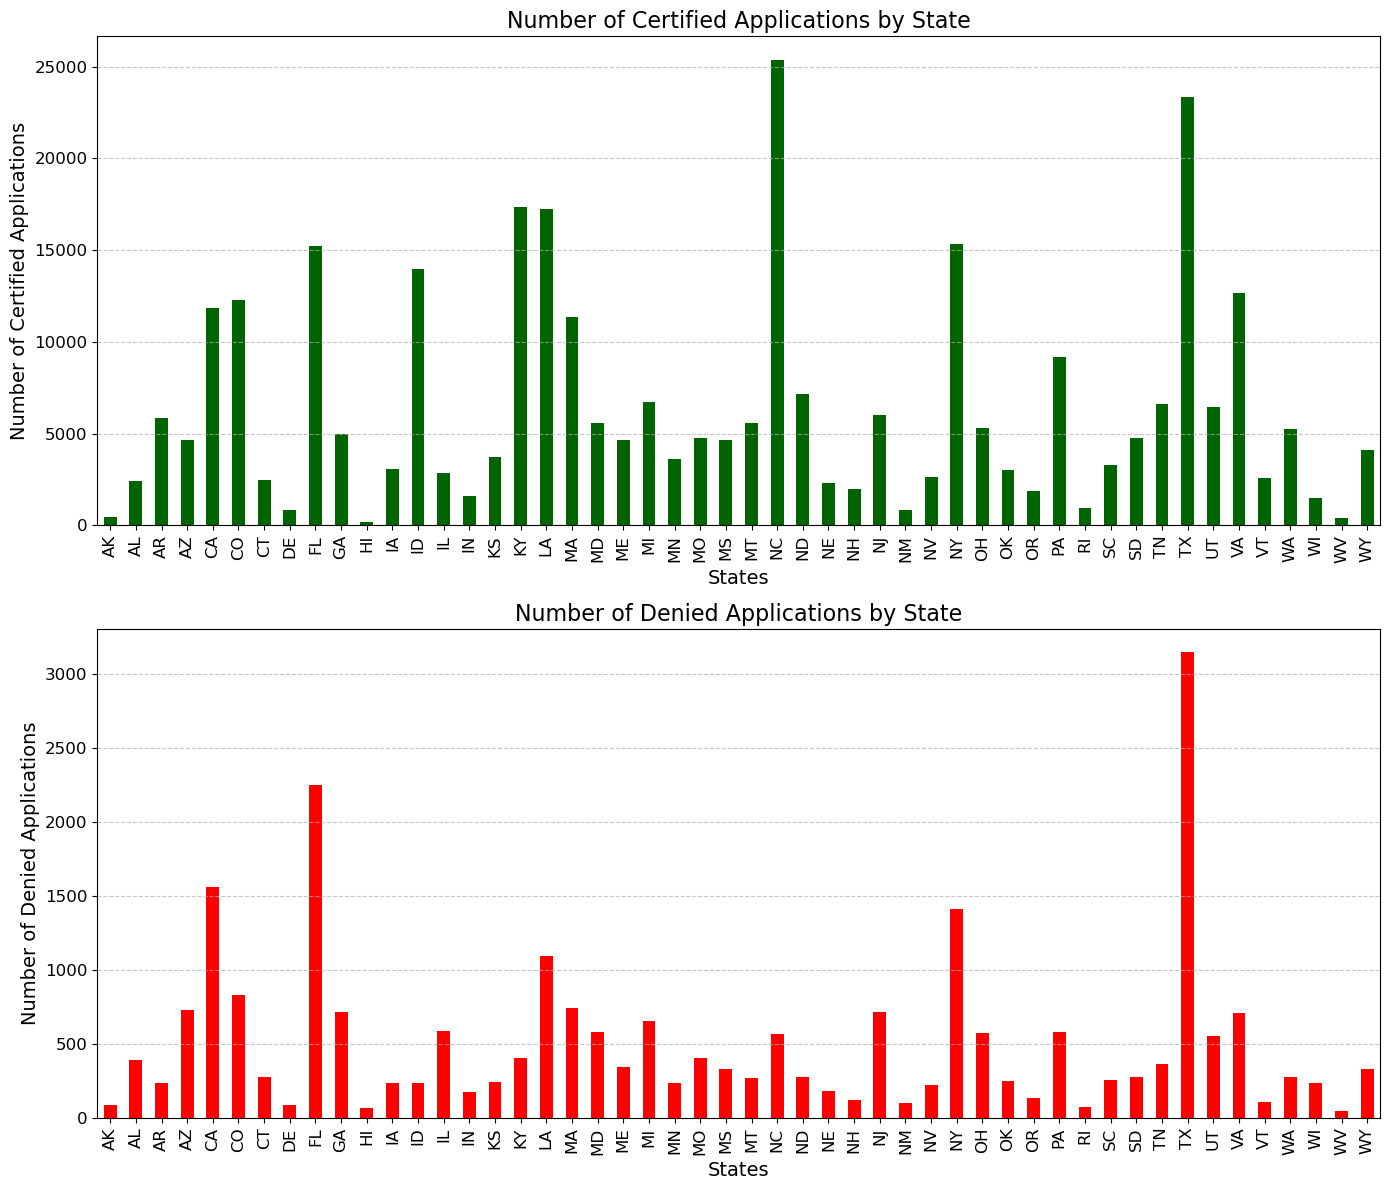

In [20]:
#Analyze states for both certified and denied
state_counts = df.groupby(['employer_state', 'Visa_Status_Simplified']).size().unstack(fill_value=0)

# Create a figure with two subplots
plt.figure(figsize=(14, 12))  # Increase figure size for better readability

# Plotting Certified applications
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
state_counts['Certified'].plot(kind='bar', color='darkgreen')
plt.title('Number of Certified Applications by State', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Number of Certified Applications', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add gridlines for better readability

# Plotting Denied applications
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
state_counts['Denied'].plot(kind='bar', color='red')
plt.title('Number of Denied Applications by State', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Number of Denied Applications', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add gridlines for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

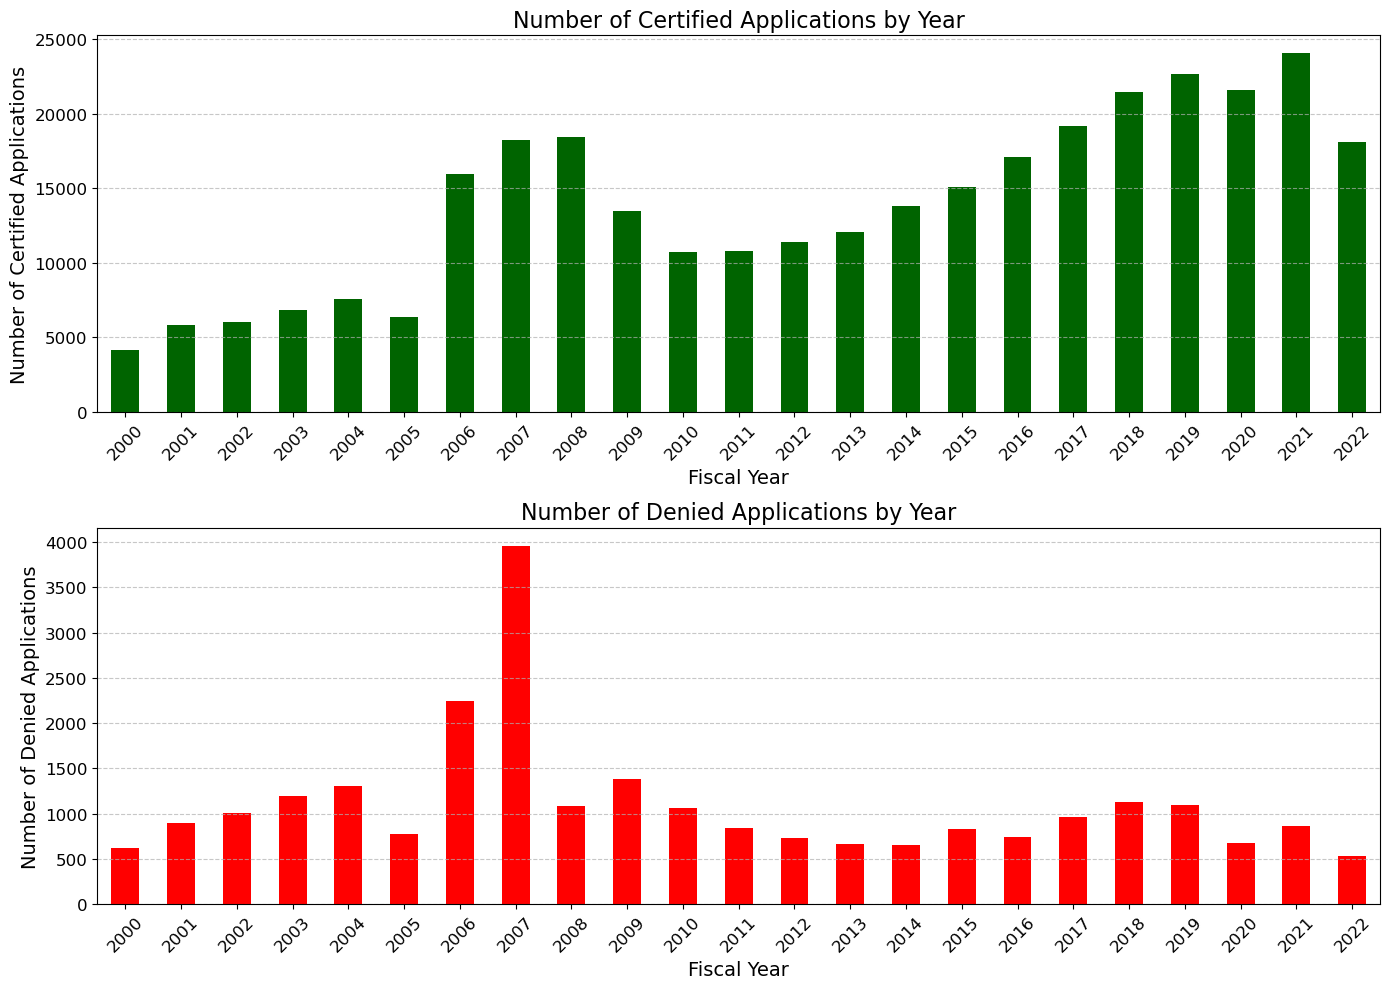

In [21]:
# Group the data by fiscal year and visa status, counting the number of applications
year_counts = df.groupby(['fy', 'Visa_Status_Simplified']).size().unstack(fill_value=0)

# Create a figure with two subplots
plt.figure(figsize=(14, 10))  # Increase figure size for better readability

# Plotting Certified applications
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
year_counts['Certified'].plot(kind='bar', color='darkgreen')
plt.title('Number of Certified Applications by Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Number of Certified Applications', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add gridlines for better readability

# Plotting Denied applications
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
year_counts['Denied'].plot(kind='bar', color='red')
plt.title('Number of Denied Applications by Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Number of Denied Applications', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add gridlines for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plots

In [22]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for Connecticut
connecticut_df = df[df['employer_state'] == 'CT']

# Step 2: Group by year and count job entries
jobs_per_year = connecticut_df.groupby('fy')['job_title'].count()

# Display the result
print("Number of jobs per year in Connecticut:")
print(jobs_per_year)

Number of jobs per year in Connecticut:
fy
2000     53
2001     71
2002     82
2003    108
2004    125
2005     94
2006    241
2007    301
2008    220
2009    129
2010    102
2011     89
2012     88
2013     88
2014    103
2015     88
2016     87
2017     96
2018    110
2019    122
2020    146
2021    144
2022     97
Name: job_title, dtype: int64


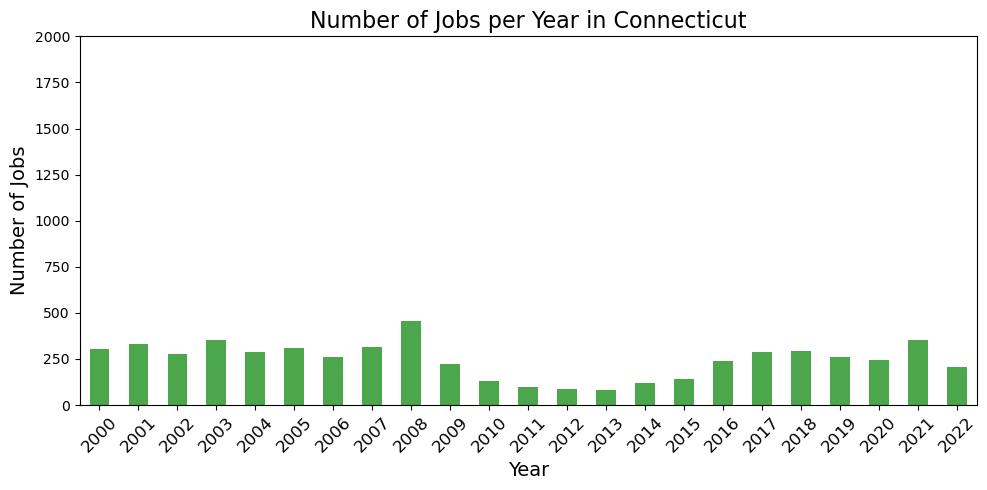

In [31]:
# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Green', alpha=0.7)  # Remove quotes from 'colors'

plt.ylim(0, 2000)
# Titles and labels
plt.title('Number of Jobs per Year in Connecticut', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

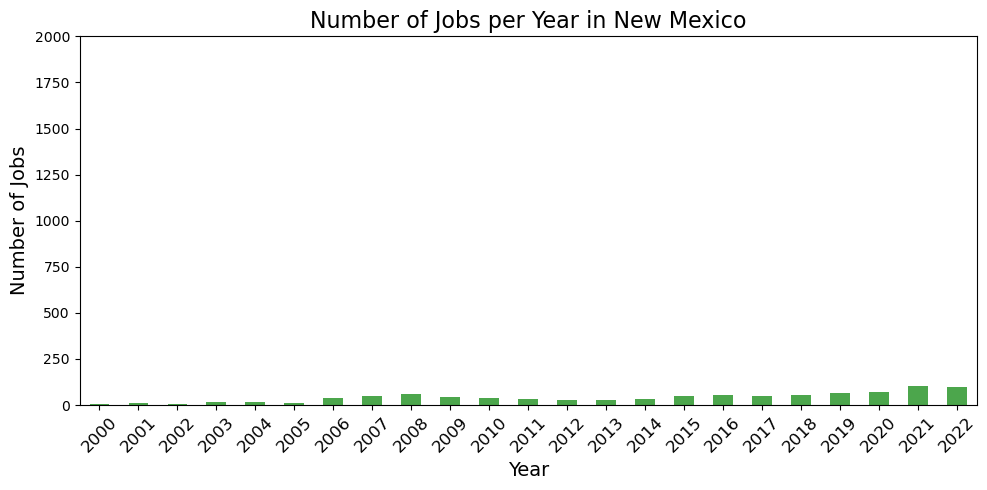

In [33]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for New Mexico
newmexico_df = df[df['employer_state'] == 'NM']
# Step 2: Group by year and count job entries
jobs_per_year = newmexico_df.groupby('fy')['job_title'].count()


# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Green', alpha=0.7)  # Remove quotes from 'colors'

plt.ylim(0, 2000)
# Titles and labels
plt.title('Number of Jobs per Year in New Mexico', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

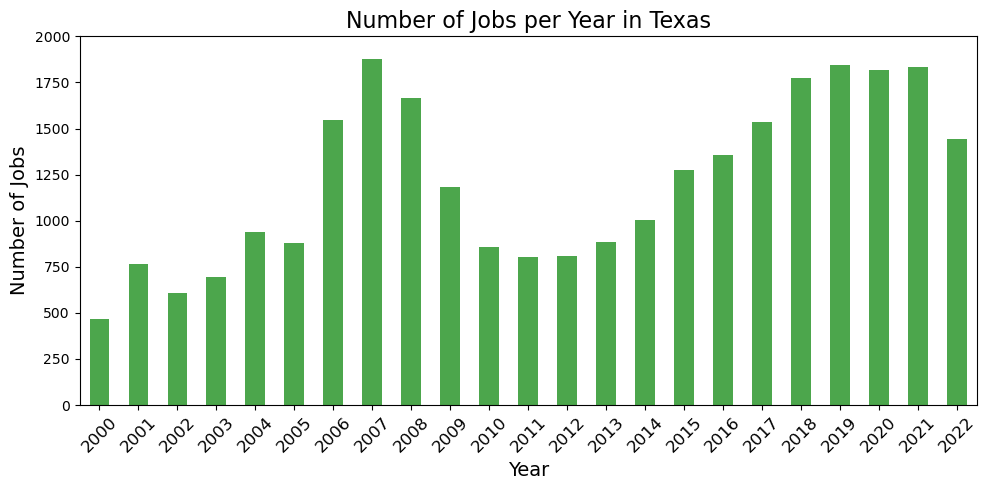

In [34]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for texas
texas_df = df[df['employer_state'] == 'TX']
# Step 2: Group by year and count job entries
jobs_per_year = texas_df.groupby('fy')['job_title'].count()
plt.ylim(0, 2000)

# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Green', alpha=0.7)  # Remove quotes from 'colors'

# Titles and labels
plt.title('Number of Jobs per Year in Texas', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


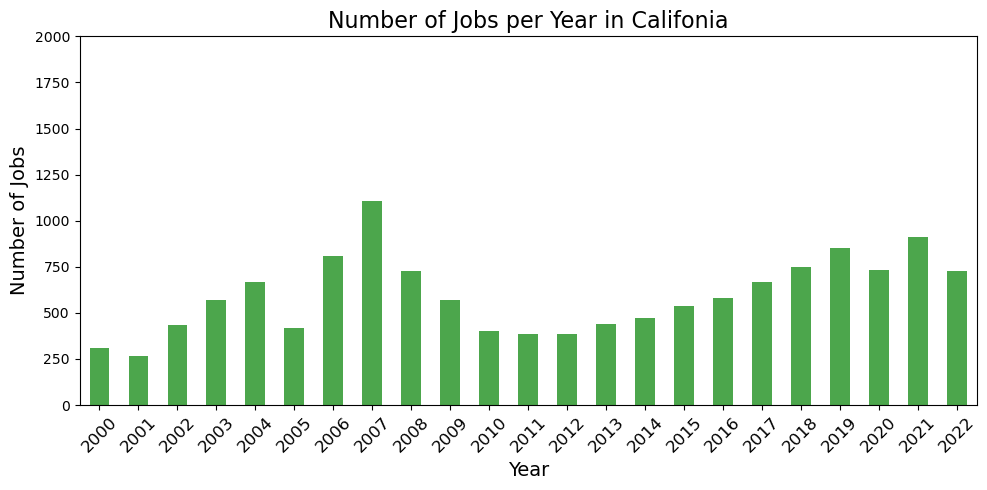

In [35]:
    # Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for califonia
califonia_df = df[df['employer_state'] == 'CA']
# Step 2: Group by year and count job entries
jobs_per_year = califonia_df.groupby('fy')['job_title'].count()

plt.ylim(0, 2000)
# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Green', alpha=0.7)  # Remove quotes from 'colors'

# Titles and labels
plt.title('Number of Jobs per Year in Califonia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

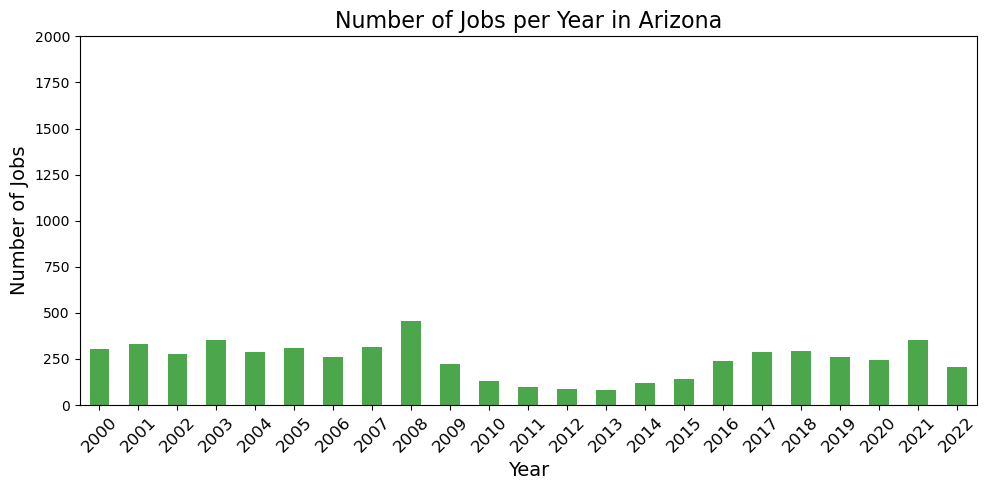

In [39]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for arizona
arizona_df = df[df['employer_state'] == 'AZ']
# Step 2: Group by year and count job entries
jobs_per_year = arizona_df.groupby('fy')['job_title'].count()

plt.ylim(0, 2000)
# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Green', alpha=0.7)  # Remove quotes from 'colors'

# Titles and labels
plt.title('Number of Jobs per Year in Arizona', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

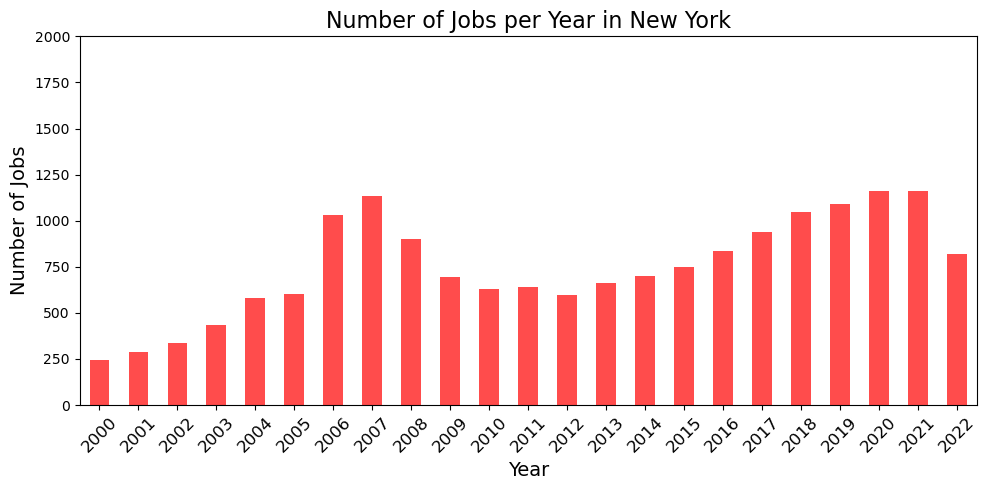

In [36]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for new york
newyork_df = df[df['employer_state'] == 'NY']
# Step 2: Group by year and count job entries
jobs_per_year = newyork_df.groupby('fy')['job_title'].count()
plt.ylim(0, 2000)

# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Red', alpha=0.7)  # Remove quotes from 'colors'

# Titles and labels
plt.title('Number of Jobs per Year in New York', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

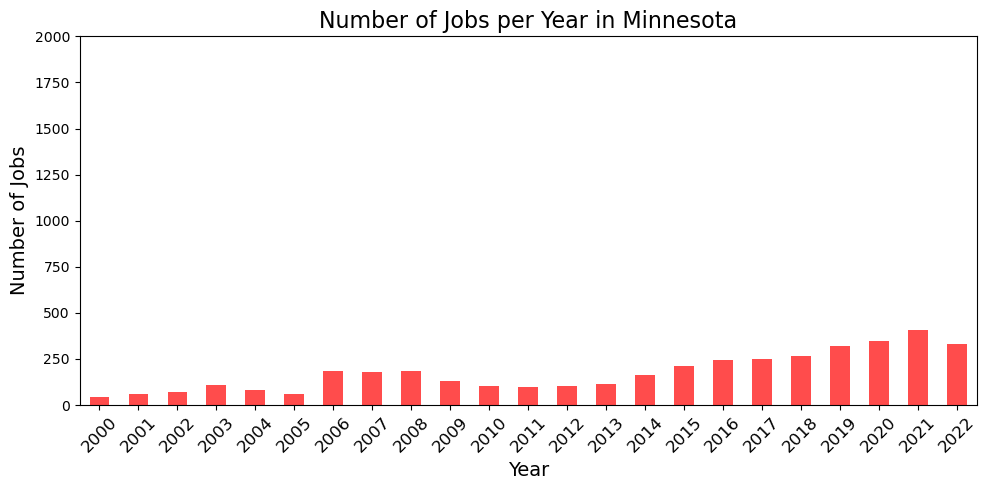

In [37]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for minnesota
minnesota_df = df[df['employer_state'] == 'MN']
# Step 2: Group by year and count job entries
jobs_per_year = minnesota_df.groupby('fy')['job_title'].count()

plt.ylim(0, 2000)
# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Red', alpha=0.7)  # Remove quotes from 'colors'

# Titles and labels
plt.title('Number of Jobs per Year in Minnesota', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

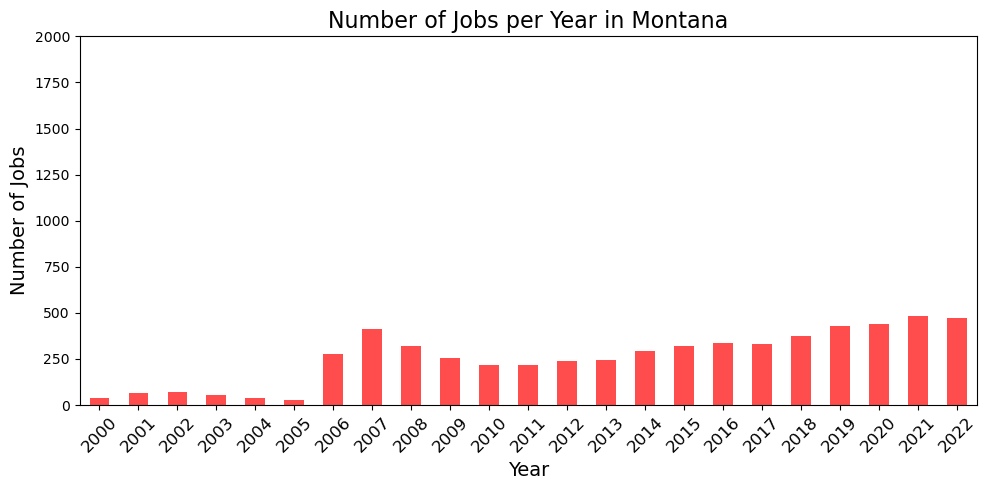

In [38]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for montana
montana_df = df[df['employer_state'] == 'MT']
# Step 2: Group by year and count job entries
jobs_per_year = montana_df.groupby('fy')['job_title'].count()
plt.ylim(0, 2000)

# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Red', alpha=0.7)  # Remove quotes from 'colors'

# Titles and labels
plt.title('Number of Jobs per Year in Montana', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

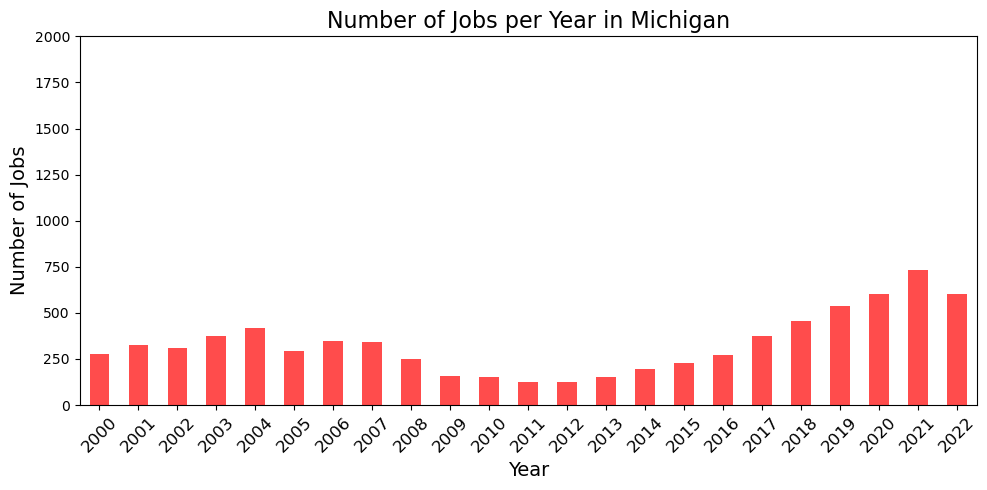

In [40]:
# Assuming df is already defined and contains 'state' and 'year' columns

# Step 1: Filter records for montana
michigan_df = df[df['employer_state'] == 'MI']
# Step 2: Group by year and count job entries
jobs_per_year = michigan_df.groupby('fy')['job_title'].count()
plt.ylim(0, 2000)

# Step 4: Plot the number of jobs per year
jobs_per_year.plot(kind='bar', figsize=(10, 5), color='Red', alpha=0.7)  # Remove quotes from 'colors'

# Titles and labels
plt.title('Number of Jobs per Year in Michigan', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()